<a href="https://colab.research.google.com/github/farihahahaa/farihahahaa/blob/main/d102project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import Counter, defaultdict
from itertools import combinations
import pandas as pd
import numpy as np
import operator
import math
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import zipfile

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'


# import torch
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers.legacy import Adam
# # Modeling
# from sklearn.feature_extraction import DictVectorizer
# from sklearn import preprocessing, tree
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import AdaBoostClassifier
# #https://www.datacamp.com/tutorial/understanding-logistic-regression-python
# from sklearn.ensemble import RandomForestClassifier
# #https://www.datacamp.com/tutorial/random-forests-classifier-python
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from scipy.stats import randint
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
filepath_PK = "/content/drive/MyDrive/d102project/Penalty Kills (2015-2024).csv"
PK = pd.read_csv(filepath_PK, index_col=0)

drive.mount("/content/drive", force_remount=True)
filepath_pens = "/content/drive/MyDrive/d102project/2023-24 NHL Penalty Counts.csv"
Pens = pd.read_csv(filepath_pens, index_col=0)

Mounted at /content/drive
Mounted at /content/drive


In [20]:
PK.head()

,seasonId,penaltyKillPct,ppGoalsAgainst,shGoalsFor,timesShorthanded,Penalties Killed
teamFullName,,,,,,
Buffalo Sabres,20172018,0.77872,52,9,235.0,183.0
Detroit Red Wings,20192020,0.74336,58,4,226.0,168.0
Chicago Blackhawks,20152016,0.79681,51,11,251.0,200.0
Washington Capitals,20212022,0.81893,44,8,243.0,199.0
Montréal Canadiens,20232024,0.76706,58,5,249.0,191.0


In [21]:
Pens.head()

,Team,Penalties Committed,Penalties Drawn,Penalty Diff
Game ID,,,,
2023020001,NSH,6,4,2
2023020001,TBL,4,6,-2
2023020002,PIT,4,2,2
2023020002,CHI,2,4,-2
2023020003,SEA,4,4,0


In [26]:
Pens['Abs Penalty Diff'] = np.abs(Pens['Penalty Diff'])
Pens.head(2)

,Team,Penalties Committed,Penalties Drawn,Penalty Diff,Abs Penalty Diff
Game ID,,,,,
2023020001,NSH,6,4,2,2
2023020001,TBL,4,6,-2,2


In [10]:
# Get data NOT from this season, then isolate desired columns, then get sums
PK[PK['seasonId'] != 20232024][['timesShorthanded', 'Penalties Killed']].sum()

Text(0.5, 1.0, 'Prior Distribution is Based off PK Data From 2015-2023')

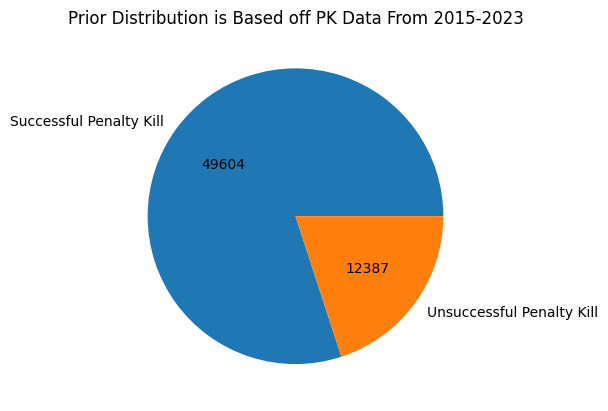

In [15]:
plt.pie([49604, 61991 - 49604], labels = ['Successful Penalty Kill', 'Unsuccessful Penalty Kill'],
        autopct= lambda x:round(x*61991/100));#'%.0f%%');
plt.title('Prior Distribution is Based off PK Data From 2015-2023')


<Axes: xlabel='Penalty Diff', ylabel='Count'>

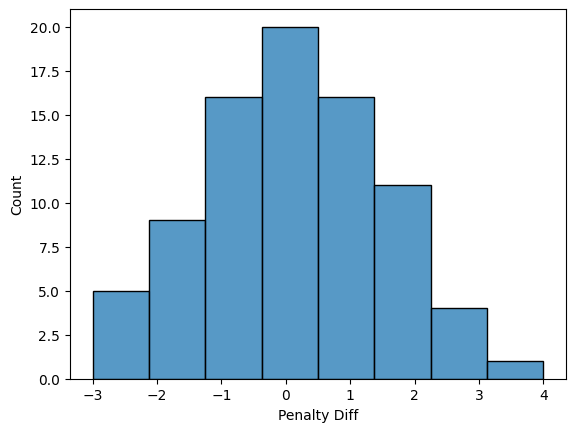

In [16]:
sns.histplot(data = Pens[Pens['Team'] == 'CAR'],
            x = 'Penalty Diff')

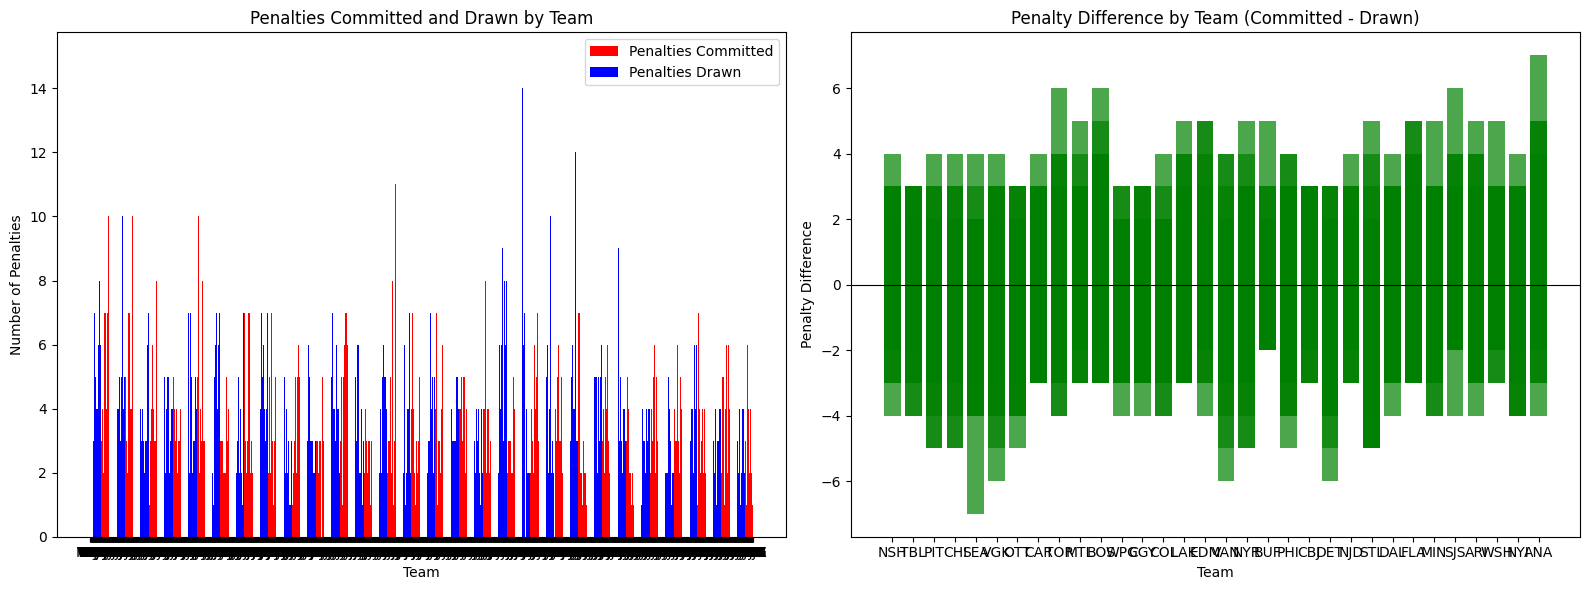

In [23]:
# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Grouped bar chart for Penalties Committed and Drawn
bar_width = 0.35  # the width of the bars
teams = np.arange(len(Pens['Team']))  # the label locations

ax[0].bar(teams - bar_width/2, Pens['Penalties Committed'], bar_width, label='Penalties Committed', color='red')
ax[0].bar(teams + bar_width/2, Pens['Penalties Drawn'], bar_width, label='Penalties Drawn', color='blue')
ax[0].set_xlabel('Team')
ax[0].set_ylabel('Number of Penalties')
ax[0].set_title('Penalties Committed and Drawn by Team')
ax[0].set_xticks(teams)
ax[0].set_xticklabels(Pens['Team'])
ax[0].legend()

# Bar chart for Penalty Difference
ax[1].bar(Pens['Team'], Pens['Penalty Diff'], color='green', alpha=0.7)
ax[1].set_title('Penalty Difference by Team (Committed - Drawn)')
ax[1].set_xlabel('Team')
ax[1].set_ylabel('Penalty Difference')
ax[1].axhline(0, color='black', linewidth=0.8)  # Add a line at zero for reference

plt.tight_layout()
plt.show()


In [34]:
Pens_sorted = Pens.sort_values(by='Abs Penalty Diff', ascending=False).head(10)
Pens_sorted

,Team,Penalties Committed,Penalties Drawn,Penalty Diff,Abs Penalty Diff
Game ID,,,,,
2023021162,ANA,12,5,7,7
2023021162,SEA,5,12,-7,7
2023020215,TOR,10,4,6,6
2023020873,SJS,7,1,6,6
2023020873,VGK,1,7,-6,6
2023020161,DET,6,12,-6,6
2023020161,BOS,12,6,6,6
2023020215,VAN,4,10,-6,6
2023020773,STL,1,6,-5,5


<Axes: xlabel='Team'>

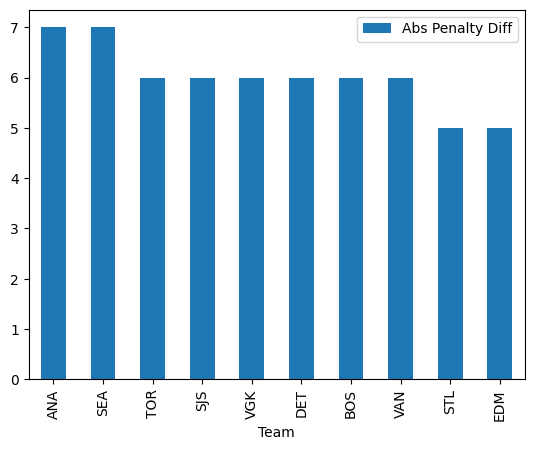

In [35]:
Pens_sorted.plot.bar(x='Team', y='Abs Penalty Diff')

In [39]:
#sns.histplot(data = Pens_sorted, x = 'Abs Penalty Diff')
#this was dumb